In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

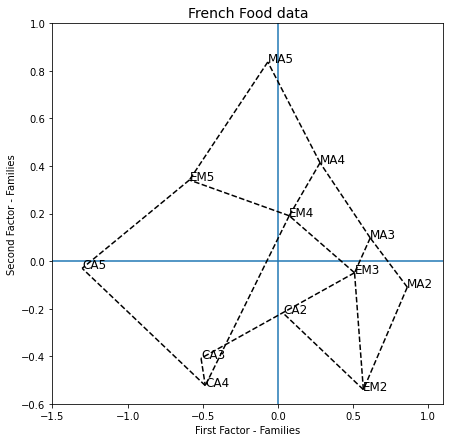

In [2]:
x = pd.read_csv("food.dat", sep = "\s+", header=None)

x = x.iloc[:, 1:]
x1 = np.sqrt((len(x) - 1) * (x.std()**2)/len(x))
x2 = x - np.tile(np.array(x.mean()), (len(x), 1))
x = x2/x1

e1, e2 = np.linalg.eig(x @ x.T/len(x))
a = e2[:, :2]
w = a * np.sqrt(np.tile(e1[:2], (len(a), 1)))

food = ["MA2", "EM2", "CA2", "MA3", "EM3", "CA3", "MA4", "EM4", "CA4", "MA5", 
        "EM5", "CA5"]

# Plot 1
fig, ax = plt.subplots(figsize = (7, 7))
ax.scatter(w[:, 0], -w[:, 1], c = "w")
for i in range(len(food)):
    ax.text(w[i, 0], -w[i, 1], food[i], fontsize = 12)

ax.vlines(0, -1, 1.2)
ax.hlines(0, -2, 1.2)

j = 0
for i in range(1, 5):
    ax.plot([w[j, 0], w[i, 0]], [-w[j, 1], -w[i, 1]], linestyle = "dashed", c = "black")
    j = np.abs(j-1)
ax.plot([w[3, 0], w[4, 0]], [-w[3, 1], -w[4, 1]], linestyle = "dashed", c = "black")
ax.plot([w[3, 0], w[6, 0]], [-w[3, 1], -w[6, 1]], linestyle = "dashed", c = "black")
ax.plot([w[4, 0], w[5, 0]], [-w[4, 1], -w[5, 1]], linestyle = "dashed", c = "black")
ax.plot([w[4, 0], w[7, 0]], [-w[4, 1], -w[7, 1]], linestyle = "dashed", c = "black")
ax.plot([w[5, 0], w[8, 0]], [-w[5, 1], -w[8, 1]], linestyle = "dashed", c = "black")
ax.plot([w[6, 0], w[7, 0]], [-w[6, 1], -w[7, 1]], linestyle = "dashed", c = "black")
ax.plot([w[6, 0], w[9, 0]], [-w[6, 1], -w[9, 1]], linestyle = "dashed", c = "black")
ax.plot([w[7, 0], w[8, 0]], [-w[7, 1], -w[8, 1]], linestyle = "dashed", c = "black")
ax.plot([w[7, 0], w[10, 0]], [-w[7, 1], -w[10, 1]], linestyle = "dashed", c = "black")
ax.plot([w[8, 0], w[11, 0]], [-w[8, 1], -w[11, 1]], linestyle = "dashed", c = "black")
ax.plot([w[9, 0], w[10, 0]], [-w[9, 1], -w[10, 1]], linestyle = "dashed", c = "black")
ax.plot([w[10, 0], w[11, 0]], [-w[10, 1], -w[11, 1]], linestyle = "dashed", c = "black")

ax.set_xlim(-1.5, 1.1)
ax.set_ylim(-0.6, 1)
ax.set_xlabel("First Factor - Families")
ax.set_ylabel("Second Factor - Families")
plt.title("French Food data", fontsize = 14)
plt.show()

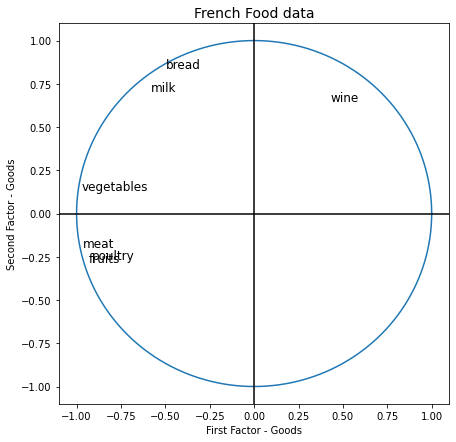

In [3]:
g1, g2 = np.linalg.eig(x.T @ x/len(x))
b = g2[:, :2]
z = b * np.sqrt(np.tile(g1[:2], (b.shape[0], 1)))

# Plot 2
ucircle = np.array([np.cos((np.arange(0, 361)/180)*np.pi), 
                    np.sin((np.arange(0, 361)/180)*np.pi)])

fig, ax = plt.subplots(figsize = (7, 7))
ax.plot(ucircle[0], ucircle[1])

ax.scatter(-z[:, 0], z[:, 1], c = "w")
label = ["bread", "vegetables", "fruits", "meat", "poultry", "milk", "wine"]
for i in range(len(label)):
    ax.text(-z[i, 0], z[i, 1], label[i], fontsize = 12)

ax.axvline(0, c = "k")
ax.axhline(0, c = "k")

ax.set_xlabel("First Factor - Goods")
ax.set_ylabel("Second Factor - Goods")
plt.title("French Food data", fontsize = 14)
plt.show()
